# IX.B. Map equation similarity

Map equation similarity considers the modular flow statistics identified by the map equation. These flow statistics tell us at what rate a randm walker transitions along each link, whether that link exists or not, an approach that allow predicting links with the map equation. For a link that is used at rate $r$, we can compute how many bits are required to describe this transition: $\log_2(r)$.

In [1]:
%matplotlib inline

from infomap import Infomap
from mapsim import MapSim
from util import get_map_equation_example_network

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_palette(sns.color_palette("colorblind"))

In [3]:
# we use the "standard" map equation example network and plot it below
# the networks is weighted and undirected
G, pos = get_map_equation_example_network()

In [4]:
im = Infomap(silent = True, two_level = True, num_trials = 10)
im.add_networkx_graph(G)
im.run()
modules = dict(im.modules)

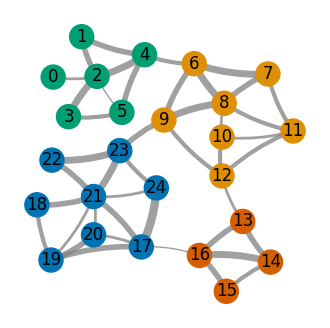

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))

nx.draw_networkx_nodes(G = G, pos = pos, ax = ax, node_color = [sns.color_palette()[modules[node]-1] for node in sorted(G.nodes)])
nx.draw_networkx_edges(G = G, pos = pos, ax = ax, edgelist = sorted(G.edges), width = [G.get_edge_data(*e)["weight"] for e in sorted(G.edges)], alpha = 0.75, arrows = True, connectionstyle = "arc3,rad=0.1", edge_color = "grey")
nx.draw_networkx_labels(G = G, pos = pos, ax = ax)

ax.axis("off")
plt.show()

In [6]:
ms = MapSim()
ms.from_infomap(im)

Because modules are designed such that random walkers tend to stay within modules, links inside modules are used at higher rates and are cheaper to describe.

In [7]:
# the cost for a non-link inside the green module
u = 0
v = 1
print(f"{u}->{v}: {ms.get_path_cost_directed(u, v):.2f} bits")

0->1: 2.95 bits


In [8]:
# mapsim scores are, in genereal, not symmetric
u = 1
v = 0
print(f"{u}->{v}: {ms.get_path_cost_directed(u, v):.2f} bits")

1->0: 4.95 bits


In [9]:
# an existing link inside the green module
u = 0
v = 2
print(f"{u}->{v}: {ms.get_path_cost_directed(u, v):.2f} bits")

0->2: 1.87 bits


In [10]:
# a non link between the green and blue modules
u =  0
v = 22
print(f"{u}->{v}: {ms.get_path_cost_directed(u, v):.2f} bits")

0->22: 9.98 bits


We can also check and rank all interaction partner for a specific source node.

In [11]:
u = 0
for (v, rate) in sorted(ms.predict_interaction_rates(0).items(), key = lambda p: p[1], reverse = True):
    print(f"{u}->{v:2}: rate={rate:.4f}, {-np.log2(rate):.2f} bits")

0-> 2: rate=0.2742, 1.87 bits
0-> 4: rate=0.2581, 1.95 bits
0-> 1: rate=0.1290, 2.95 bits
0-> 5: rate=0.1290, 2.95 bits
0-> 3: rate=0.1290, 2.95 bits
0-> 0: rate=0.0323, 4.95 bits
0-> 8: rate=0.0041, 7.95 bits
0-> 6: rate=0.0036, 8.11 bits
0-> 9: rate=0.0034, 8.19 bits
0-> 7: rate=0.0026, 8.61 bits
0->21: rate=0.0025, 8.63 bits
0->11: rate=0.0023, 8.73 bits
0->12: rate=0.0023, 8.73 bits
0->16: rate=0.0022, 8.82 bits
0->14: rate=0.0019, 9.04 bits
0->17: rate=0.0019, 9.06 bits
0->23: rate=0.0019, 9.06 bits
0->13: rate=0.0016, 9.31 bits
0->10: rate=0.0015, 9.39 bits
0->19: rate=0.0014, 9.45 bits
0->24: rate=0.0012, 9.69 bits
0->15: rate=0.0011, 9.82 bits
0->22: rate=0.0010, 9.98 bits
0->20: rate=0.0009, 10.15 bits
0->18: rate=0.0008, 10.34 bits
